## Advanced Lane Finding Project

The goals / steps of this project are the following:

* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**
* **Apply a distortion correction to raw images.**
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

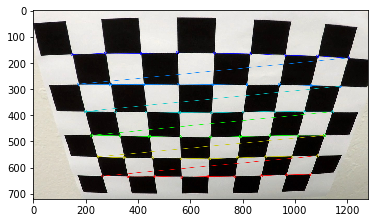

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

objpoints = []
imgpoints = []

nx = 9
ny = 6

objp = np.zeros((ny*nx,3),np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

img = mpimg.imread('./camera_cal/calibration2.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)

    img = cv2.drawChessboardCorners(img,(nx,ny),corners,ret)

    plt.imshow(img)
    plt.show()
    

In [8]:
def show_images(image_set, title_set=None,counts=None):
    num_image_toshow = len(image_set) if counts is None else counts
    plt.figure(1, figsize=(20, 16))
    for idx in range(num_image_toshow):
        plt.subplot(5,4, idx + 1)
        img = image_set[idx]
        if img.shape[0] >0:
            plt.imshow(img)
        if title_set is not None:
            s = 's={}'.format(title_set[idx])
            plt.title(s)
        plt.axis('off')
        plt.tight_layout()
    plt.show()

Original Images



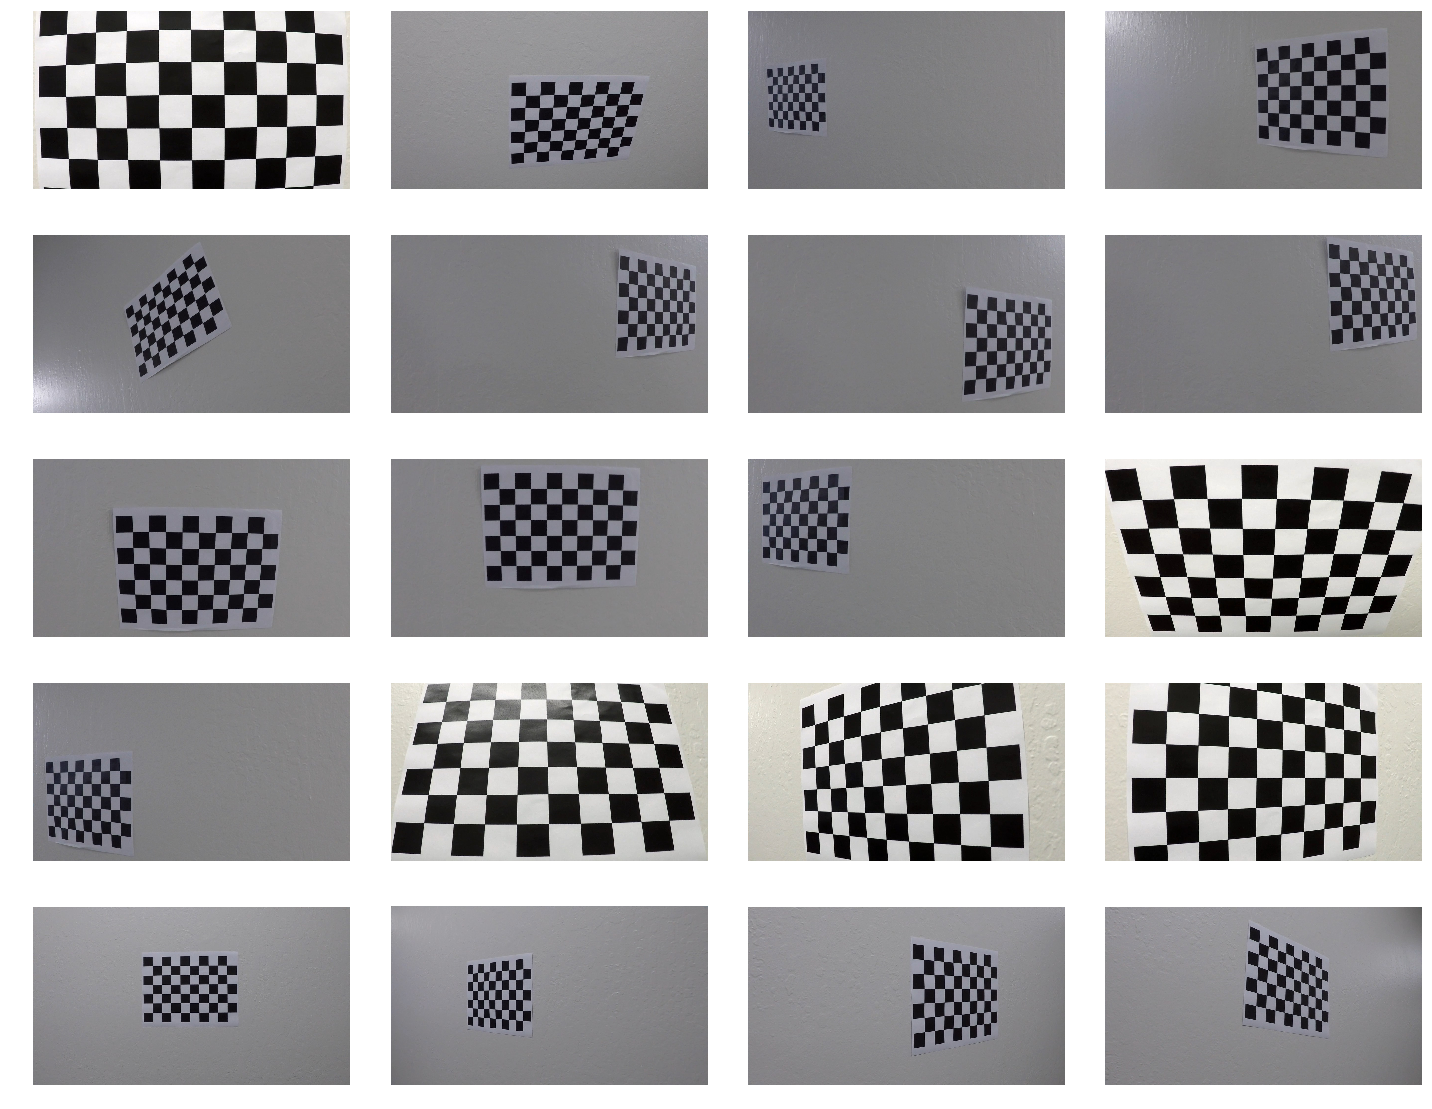

In [3]:
imageNames = glob.glob('camera_cal/calibration*.jpg')
imageset = np.array([ mpimg.imread('./' + imgName ) for imgName in imageNames ])
print('Original Images')
print()
show_images(imageset)

Undistorted Images



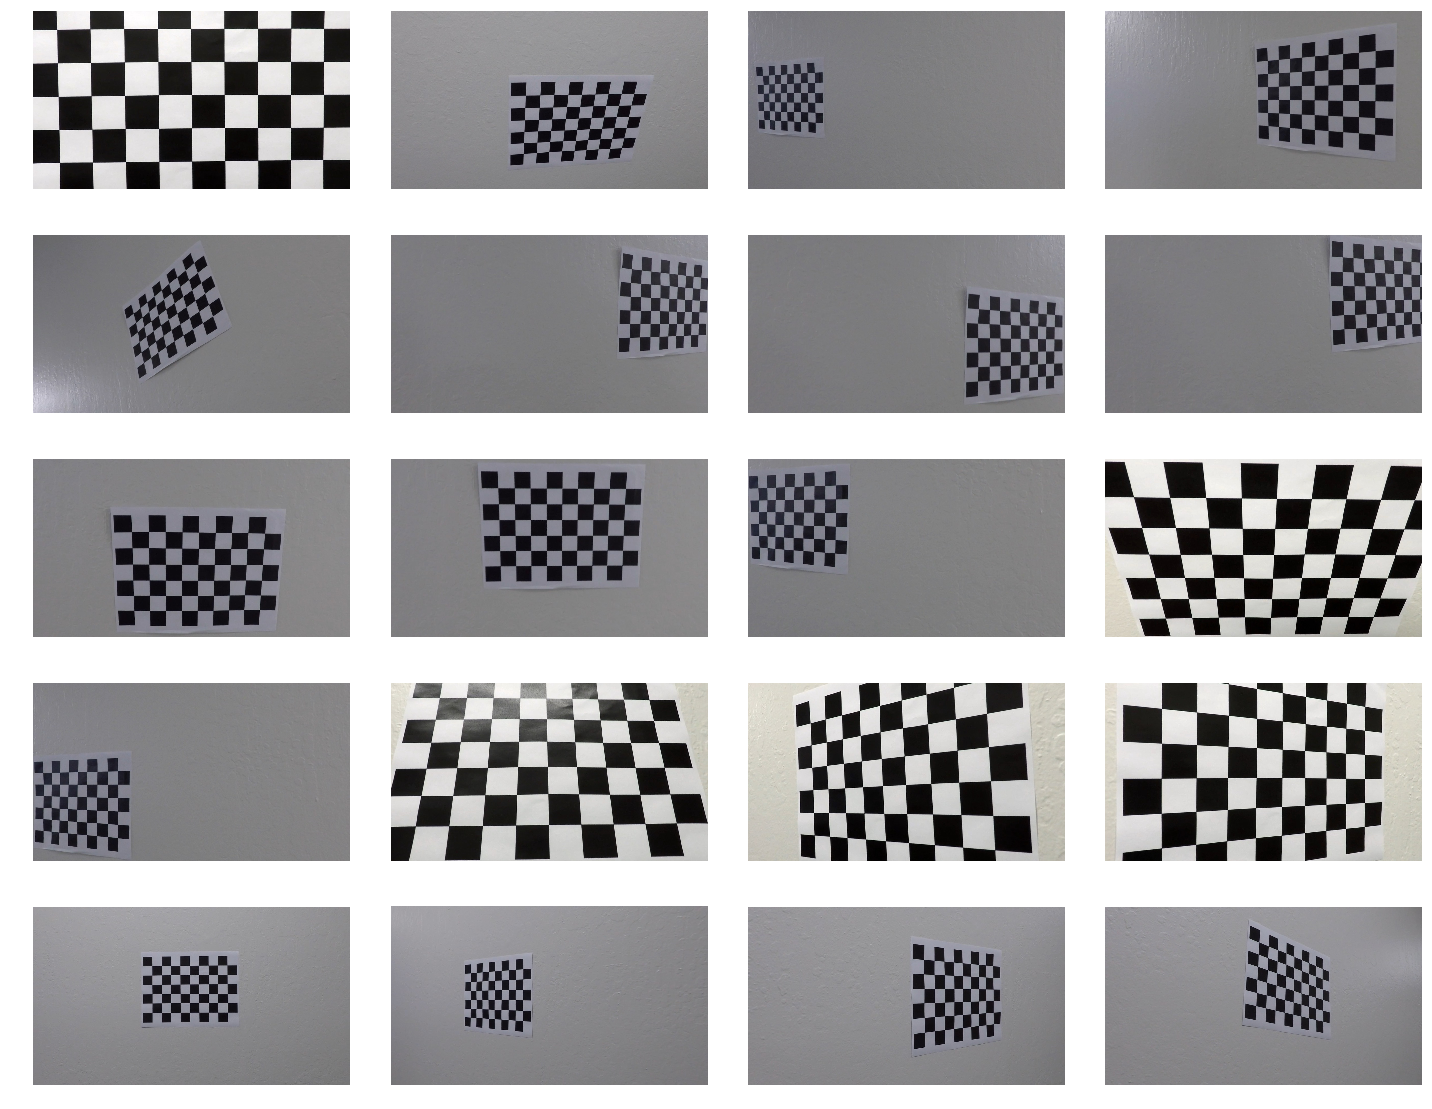

In [4]:
_, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1],None,None)
undist_imageset = np.array([ cv2.undistort(img, mtx, dist, None, mtx) for img in imageset ])
print('Undistorted Images')
print()
show_images(undist_imageset)

Sammple


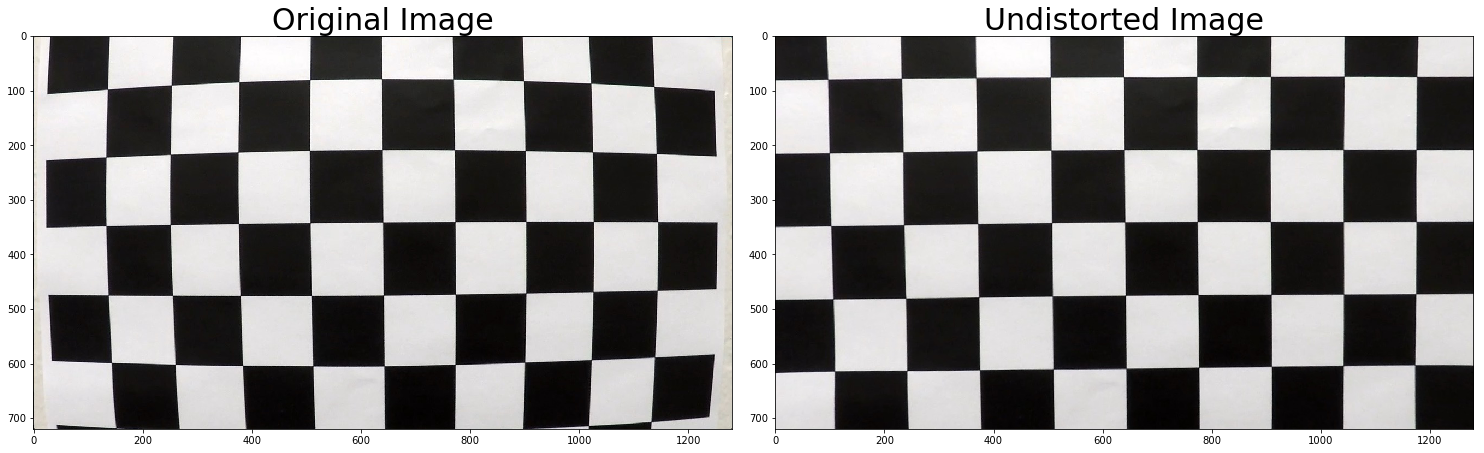

In [5]:
print('Sammple')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
f.tight_layout()
ax1.imshow(imageset[0])
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist_imageset[0])
ax2.set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [6]:
import pickle
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('./camera_calibration.p', 'wb'))

In [15]:
def corners_unwarp(img, nx, ny, mtx, dist):
    warped = np.array([])
    undis = cv2.undistort(img, mtx, dist, None, mtx)
    undis_gray = cv2.cvtColor(undis, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(undis_gray,(nx,ny),None)
    if ret == True:
            # a) draw corners
            undis = cv2.drawChessboardCorners(undis,(nx,ny),corners,ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            src = np.float32([corners[0],
                          corners[nx - 1], 
                          corners[ny*nx - nx], 
                          corners[ny*nx -1]]) 
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            h,w = undis.shape[:2]
            dst = np.float32([[100,100],[w-100,100],[100,h-100],[w-100,h-100]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            warped = cv2.warpPerspective(undis,M,(w,h),flags=cv2.INTER_LINEAR) 
    return warped

unwarped_imageset = np.array([ corners_unwarp(img, nx,ny,mtx, dist) for img in imageset ])
# print('Undistorted and Warped Images')
# print()
# show_images(unwarped_imageset)

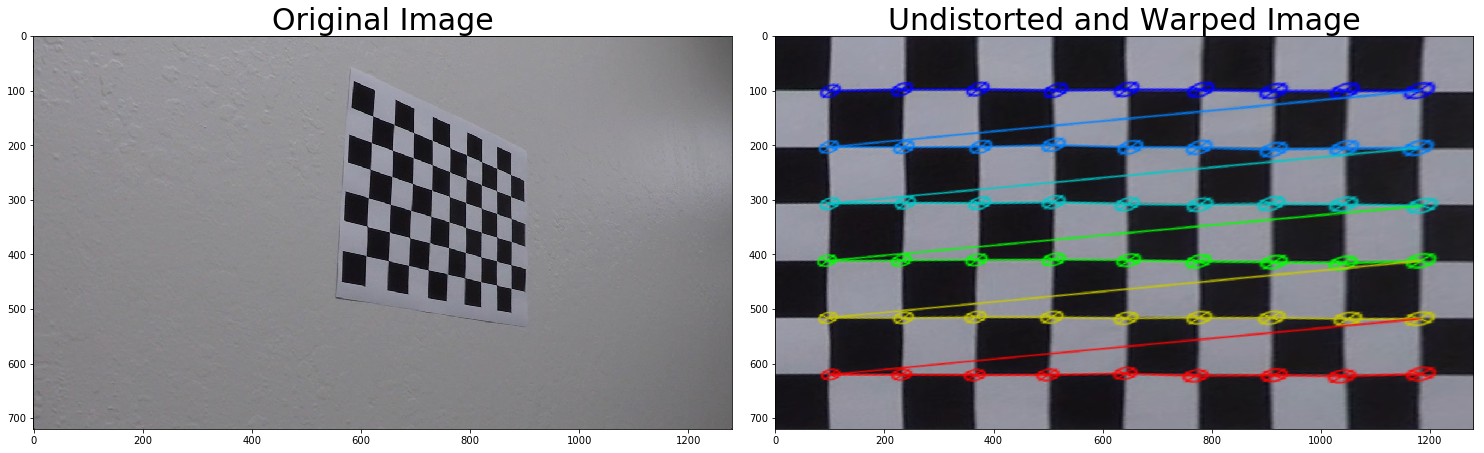

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
f.tight_layout()
ax1.imshow(imageset[19])
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(unwarped_imageset[19])
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()